In [ ]:
!pip install catboost

     |████████████████████████████████| 65.8MB 44kB/s 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stat
pd.set_option('display.max_columns', None)
%matplotlib inline

### Feature Processing
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from dateutil import relativedelta
from sklearn.preprocessing import LabelEncoder

### Feature Selection Techniques
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import VarianceThreshold

### Train Test Split
from sklearn.model_selection import train_test_split

### Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import  XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

### Metrics
import sklearn.metrics as metrics

### Hyper Paramter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

### Loading and Saving Model
import pickle

### Ensemble Technique - Combining Multiple models
## We call the algorithms like this way

## Then we use Voting Classifier for ensemble learning:
from sklearn.ensemble import VotingClassifier

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
import tensorflow as tf

from keras import backend as K
import re

In [ ]:
train_dataset = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/Final/Final Dataset for Training/train_data_final_bur_combined_rank_cat_enc.xlsx')
train_dataset = train_dataset.iloc[:,1:]
test_dataset = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/Final/Final Dataset for Training/test_data_final_bur_combined_rank_cat_enc.xlsx')
test_dataset = test_dataset.iloc[:,1:]
display(train_dataset.head())
display(test_dataset.head())
print(train_dataset.shape , test_dataset.shape)

,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,EMI,ManufacturerID,SupplierID,AGE,MonthlyIncome,State,ZiPCODE,top_up_class,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M,ID,DISBURSED-AMT/HIGH CREDIT_Median,INSTALLMENT-AMT_Median,CURRENT-BAL_Median,OVERDUE-AMT_Median,WRITE-OFF-AMT_Median,TENURE_Median,SELF-INDICATOR_Bureau_Traits_Total_Count,SELF-INDICATOR_Top_value,SELF-INDICATOR_Top_value_freq,SELF-INDICATOR_unique_values,MATCH-TYPE_Top_value,MATCH-TYPE_Top_value_freq,MATCH-TYPE_unique_values,ACCT-TYPE_Unique_count,ACCT-TYPE_Top_value,ACCT-TYPE_Top_value_freq,ACCT-TYPE_unique_values,CONTRIBUTOR-TYPE_Unique_count,CONTRIBUTOR-TYPE_Top_value,CONTRIBUTOR-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_unique_values,OWNERSHIP-IND_Unique_count,OWNERSHIP-IND_Top_value,OWNERSHIP-IND_Top_value_freq,OWNERSHIP-IND_unique_values,ACCOUNT-STATUS_Unique_count,ACCOUNT-STATUS_Top_value,ACCOUNT-STATUS_Top_value_freq,ACCOUNT-STATUS_unique_values,DPD_Hist_Median_Median,CUR BAL-Hist_Median_Median,AMT OVERDUE - HIST_Median_Median,AMT PAID - HIST_Median_Median
0,0.186877,1,48,450000,275000.0,24000.0,1568,21946,49,35833.33,0.425187,464993,1,0,1,0,1,1,1,1,275000.0,0.0,0.0,0.0,0.0,0.0,9,1,5,1,1,9,1,4,7,5,482,2,1,5,2,1,1,9,1,3,1,5,4,0.0,125115.50,615.0,0.0
1,0.255776,333,47,485000,350000.0,10500.0,1062,34802,23,666.67,0.425187,466001,0,0,1,0,0,1,1,2,700000.0,0.0,52421.0,0.0,0.0,35.0,13,2,12,1,1,13,1,7,10,4,6112,2,1,7,3,2,1,9,3,2,2,7,1,0.0,334547.50,0.0,0.0
2,0.668451,1,68,690000,519728.0,38300.0,1060,127335,39,45257.00,0.425187,462030,6,0,0,1,1,0,1,3,44000.0,0.0,0.0,0.0,0.0,0.0,31,2,29,1,1,31,1,8,2,8,7776,5,3,13,55,3,1,26,4,3,1,19,4,0.0,30303.00,0.0,0.0
3,0.168888,125,48,480000,400000.0,11600.0,1060,25094,24,20833.33,0.425187,473335,1,0,1,0,0,1,1,7,315000.0,0.0,0.0,0.0,0.0,5.0,4,1,2,1,1,4,1,2,1,3,19,1,1,4,1,1,1,4,1,2,1,2,1,0.0,195207.75,0.0,0.0
4,0.168888,152,44,619265,440000.0,15000.0,1046,21853,56,27313.67,0.269824,495442,2,0,1,0,1,1,1,8,200000.0,0.0,6989.0,0.0,0.0,42.0,7,2,6,1,1,7,1,3,1,4,162,3,1,4,4,3,1,3,4,4,2,3,45,0.0,172109.00,0.0,0.0


,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,EMI,ManufacturerID,SupplierID,AGE,MonthlyIncome,State,ZiPCODE,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M,ID,DISBURSED-AMT/HIGH CREDIT_Median,INSTALLMENT-AMT_Median,CURRENT-BAL_Median,OVERDUE-AMT_Median,WRITE-OFF-AMT_Median,TENURE_Median,SELF-INDICATOR_Bureau_Traits_Total_Count,SELF-INDICATOR_Top_value,SELF-INDICATOR_Top_value_freq,SELF-INDICATOR_unique_values,MATCH-TYPE_Top_value,MATCH-TYPE_Top_value_freq,MATCH-TYPE_unique_values,ACCT-TYPE_Unique_count,ACCT-TYPE_Top_value,ACCT-TYPE_Top_value_freq,ACCT-TYPE_unique_values,CONTRIBUTOR-TYPE_Unique_count,CONTRIBUTOR-TYPE_Top_value,CONTRIBUTOR-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_unique_values,OWNERSHIP-IND_Unique_count,OWNERSHIP-IND_Top_value,OWNERSHIP-IND_Top_value_freq,OWNERSHIP-IND_unique_values,ACCOUNT-STATUS_Unique_count,ACCOUNT-STATUS_Top_value,ACCOUNT-STATUS_Top_value_freq,ACCOUNT-STATUS_unique_values,DPD_Hist_Median_Median,CUR BAL-Hist_Median_Median,AMT OVERDUE - HIST_Median_Median,AMT PAID - HIST_Median_Median
0,0.186877,2,46,480000,365000.0,1000.0,1046,22354,50,32069.00,0.425187,473001,0,1,0,0,1,1,4,232000.0,611.5,42023.5,0.0,0.0,60.0,4,2,3,1,1,4,1,4,1,1,2431,3,6,2,79,2,1,2,2,2,2,3,1,0.0,132597.5,0.0,0.0
1,0.255776,2,45,480000,285000.0,9300.0,1046,22354,35,25000.00,0.425187,473001,0,1,0,0,1,1,5,106008.0,0.0,0.0,0.0,0.0,0.0,8,2,7,1,1,8,1,5,2,3,1315,4,1,3,64,2,1,6,2,2,1,6,1,0.0,98453.5,0.0,0.0
2,0.255776,2,48,580000,400000.0,35800.0,1060,65929,37,23333.33,0.425187,473001,0,0,1,1,1,1,6,230000.0,0.0,0.0,0.0,0.0,9.5,12,2,10,1,1,12,1,4,7,7,318,2,1,11,3,3,1,6,4,2,1,11,1,0.0,22018.0,0.0,0.0
3,0.168888,154,36,725000,500000.0,52000.0,1049,68597,55,91666.67,0.269824,493558,1,0,0,1,1,1,25,400000.0,0.0,63796.5,0.0,0.0,0.0,2,1,1,1,1,2,1,2,3,1,2,2,1,1,2,1,1,2,1,2,2,1,1,0.0,139003.0,0.0,0.0
4,0.255776,194,48,617000,400000.0,35400.0,1049,38493,48,12500.00,0.430084,754137,0,0,1,1,1,1,119,465000.0,8000.0,58100.0,0.0,0.0,23.0,2,1,1,1,1,2,1,2,7,1,5,1,1,2,1,2,2,1,3,2,2,1,1,0.0,254296.0,0.0,265000.0


(128654, 53) (14745, 52)


In [ ]:
y = train_dataset['top_up_class']
X = train_dataset.drop('top_up_class',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(102923, 52) (25731, 52) (102923,) (25731,)


In [ ]:
sc = StandardScaler()
X_train_st = sc.fit_transform(X_train)
X_test_st = sc.transform(X_test)

### K Fold Cross Validation

In [ ]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
model = LGBMClassifier()
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(model, X_train_st, y_train, scoring='f1_macro', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.313 (0.010)


In [ ]:
scores

array([0.3070895 , 0.30642082, 0.31853566, 0.30634734, 0.31254352,
       0.30764385, 0.3357559 , 0.30748837, 0.32395645, 0.29957155])

#### Repeatative K Fold Cross validation

In [ ]:
model = LGBMClassifier()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_train_st, y_train, scoring='f1_macro', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

### Training and Handling imbalanced Dataset

In [ ]:
train_dataset = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/Final/Final Dataset for Training/train_data_final_bur_combined_rank_cat_enc.xlsx')
train_dataset = train_dataset.iloc[:,1:]
test_dataset = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/Final/Final Dataset for Training/test_data_final_bur_combined_rank_cat_enc.xlsx')
test_dataset = test_dataset.iloc[:,1:]
display(train_dataset.head())
display(test_dataset.head())
print(train_dataset.shape , test_dataset.shape)

,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,EMI,ManufacturerID,SupplierID,AGE,MonthlyIncome,State,ZiPCODE,top_up_class,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M,ID,DISBURSED-AMT/HIGH CREDIT_Median,INSTALLMENT-AMT_Median,CURRENT-BAL_Median,OVERDUE-AMT_Median,WRITE-OFF-AMT_Median,TENURE_Median,SELF-INDICATOR_Bureau_Traits_Total_Count,SELF-INDICATOR_Top_value,SELF-INDICATOR_Top_value_freq,SELF-INDICATOR_unique_values,MATCH-TYPE_Top_value,MATCH-TYPE_Top_value_freq,MATCH-TYPE_unique_values,ACCT-TYPE_Unique_count,ACCT-TYPE_Top_value,ACCT-TYPE_Top_value_freq,ACCT-TYPE_unique_values,CONTRIBUTOR-TYPE_Unique_count,CONTRIBUTOR-TYPE_Top_value,CONTRIBUTOR-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_unique_values,OWNERSHIP-IND_Unique_count,OWNERSHIP-IND_Top_value,OWNERSHIP-IND_Top_value_freq,OWNERSHIP-IND_unique_values,ACCOUNT-STATUS_Unique_count,ACCOUNT-STATUS_Top_value,ACCOUNT-STATUS_Top_value_freq,ACCOUNT-STATUS_unique_values,DPD_Hist_Median_Median,CUR BAL-Hist_Median_Median,AMT OVERDUE - HIST_Median_Median,AMT PAID - HIST_Median_Median
0,0.186877,1,48,450000,275000.0,24000.0,1568,21946,49,35833.33,0.425187,464993,1,0,1,0,1,1,1,1,275000.0,0.0,0.0,0.0,0.0,0.0,9,1,5,1,1,9,1,4,7,5,482,2,1,5,2,1,1,9,1,3,1,5,4,0.0,125115.50,615.0,0.0
1,0.255776,333,47,485000,350000.0,10500.0,1062,34802,23,666.67,0.425187,466001,0,0,1,0,0,1,1,2,700000.0,0.0,52421.0,0.0,0.0,35.0,13,2,12,1,1,13,1,7,10,4,6112,2,1,7,3,2,1,9,3,2,2,7,1,0.0,334547.50,0.0,0.0
2,0.668451,1,68,690000,519728.0,38300.0,1060,127335,39,45257.00,0.425187,462030,6,0,0,1,1,0,1,3,44000.0,0.0,0.0,0.0,0.0,0.0,31,2,29,1,1,31,1,8,2,8,7776,5,3,13,55,3,1,26,4,3,1,19,4,0.0,30303.00,0.0,0.0
3,0.168888,125,48,480000,400000.0,11600.0,1060,25094,24,20833.33,0.425187,473335,1,0,1,0,0,1,1,7,315000.0,0.0,0.0,0.0,0.0,5.0,4,1,2,1,1,4,1,2,1,3,19,1,1,4,1,1,1,4,1,2,1,2,1,0.0,195207.75,0.0,0.0
4,0.168888,152,44,619265,440000.0,15000.0,1046,21853,56,27313.67,0.269824,495442,2,0,1,0,1,1,1,8,200000.0,0.0,6989.0,0.0,0.0,42.0,7,2,6,1,1,7,1,3,1,4,162,3,1,4,4,3,1,3,4,4,2,3,45,0.0,172109.00,0.0,0.0


,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,EMI,ManufacturerID,SupplierID,AGE,MonthlyIncome,State,ZiPCODE,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M,ID,DISBURSED-AMT/HIGH CREDIT_Median,INSTALLMENT-AMT_Median,CURRENT-BAL_Median,OVERDUE-AMT_Median,WRITE-OFF-AMT_Median,TENURE_Median,SELF-INDICATOR_Bureau_Traits_Total_Count,SELF-INDICATOR_Top_value,SELF-INDICATOR_Top_value_freq,SELF-INDICATOR_unique_values,MATCH-TYPE_Top_value,MATCH-TYPE_Top_value_freq,MATCH-TYPE_unique_values,ACCT-TYPE_Unique_count,ACCT-TYPE_Top_value,ACCT-TYPE_Top_value_freq,ACCT-TYPE_unique_values,CONTRIBUTOR-TYPE_Unique_count,CONTRIBUTOR-TYPE_Top_value,CONTRIBUTOR-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_unique_values,OWNERSHIP-IND_Unique_count,OWNERSHIP-IND_Top_value,OWNERSHIP-IND_Top_value_freq,OWNERSHIP-IND_unique_values,ACCOUNT-STATUS_Unique_count,ACCOUNT-STATUS_Top_value,ACCOUNT-STATUS_Top_value_freq,ACCOUNT-STATUS_unique_values,DPD_Hist_Median_Median,CUR BAL-Hist_Median_Median,AMT OVERDUE - HIST_Median_Median,AMT PAID - HIST_Median_Median
0,0.186877,2,46,480000,365000.0,1000.0,1046,22354,50,32069.00,0.425187,473001,0,1,0,0,1,1,4,232000.0,611.5,42023.5,0.0,0.0,60.0,4,2,3,1,1,4,1,4,1,1,2431,3,6,2,79,2,1,2,2,2,2,3,1,0.0,132597.5,0.0,0.0
1,0.255776,2,45,480000,285000.0,9300.0,1046,22354,35,25000.00,0.425187,473001,0,1,0,0,1,1,5,106008.0,0.0,0.0,0.0,0.0,0.0,8,2,7,1,1,8,1,5,2,3,1315,4,1,3,64,2,1,6,2,2,1,6,1,0.0,98453.5,0.0,0.0
2,0.255776,2,48,580000,400000.0,35800.0,1060,65929,37,23333.33,0.425187,473001,0,0,1,1,1,1,6,230000.0,0.0,0.0,0.0,0.0,9.5,12,2,10,1,1,12,1,4,7,7,318,2,1,11,3,3,1,6,4,2,1,11,1,0.0,22018.0,0.0,0.0
3,0.168888,154,36,725000,500000.0,52000.0,1049,68597,55,91666.67,0.269824,493558,1,0,0,1,1,1,25,400000.0,0.0,63796.5,0.0,0.0,0.0,2,1,1,1,1,2,1,2,3,1,2,2,1,1,2,1,1,2,1,2,2,1,1,0.0,139003.0,0.0,0.0
4,0.255776,194,48,617000,400000.0,35400.0,1049,38493,48,12500.00,0.430084,754137,0,0,1,1,1,1,119,465000.0,8000.0,58100.0,0.0,0.0,23.0,2,1,1,1,1,2,1,2,7,1,5,1,1,2,1,2,2,1,3,2,2,1,1,0.0,254296.0,0.0,265000.0


(128654, 53) (14745, 52)


In [ ]:
y = train_dataset['top_up_class']
X = train_dataset.drop('top_up_class',axis=1)
X.shape , y.shape

((128654, 52), (128654,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(102923, 52) (25731, 52) (102923,) (25731,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Class=0, n=85397 (14.286%)
Class=4, n=85397 (14.286%)
Class=1, n=85397 (14.286%)
Class=5, n=85397 (14.286%)
Class=2, n=85397 (14.286%)
Class=3, n=85397 (14.286%)
Class=6, n=85397 (14.286%)


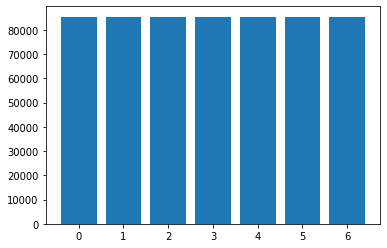

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_os, y_train_os = oversample.fit_resample(X_train, y_train)
# summarize distribution
counter = Counter(y_train_os)
for k,v in counter.items():
	per = v / len(y_train_os) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [ ]:
sc = StandardScaler()
X_train_st = sc.fit_transform(X_train_os)
X_test_st = sc.transform(X_test)

In [ ]:
model_rf_final = RandomForestClassifier()
model_rf_final = model_rf_final.fit(X_train_st,y_train_os)

y_pred = model_rf_final.predict(X_test_st)
print('------------------------RF MODEL------------------------')
print('F1 Score', metrics.f1_score(y_test,y_pred,average='macro'))
print('Accuracy Score', metrics.accuracy_score(y_test,y_pred))
print('Classification report \n ')
print(metrics.classification_report(y_test,y_pred))
print('\n')

------------------------RF MODEL------------------------
F1 Score 0.3339806221680494
Accuracy Score 0.8273289028797948
Classification report 
 
              precision    recall  f1-score   support

           0       0.88      0.95      0.92     21279
           1       0.48      0.34      0.40      1642
           2       0.24      0.06      0.10       761
           3       0.30      0.26      0.28       683
           4       0.33      0.18      0.24       663
           5       0.33      0.25      0.28       502
           6       0.23      0.09      0.13       201

    accuracy                           0.83     25731
   macro avg       0.40      0.30      0.33     25731
weighted avg       0.79      0.83      0.81     25731





In [ ]:
model_rf_final = CatBoostClassifier()
model_rf_final = model_rf_final.fit(X_train_st,y_train_os)

y_pred = model_rf_final.predict(X_test_st)
print('------------------------RF MODEL------------------------')
print('F1 Score', metrics.f1_score(y_test,y_pred,average='macro'))
print('Accuracy Score', metrics.accuracy_score(y_test,y_pred))
print('Classification report \n ')
print(metrics.classification_report(y_test,y_pred))
print('\n')

Learning rate set to 0.109629
0:	learn: 1.8262859	total: 1.4s	remaining: 23m 15s
1:	learn: 1.7433988	total: 2.65s	remaining: 22m 1s
2:	learn: 1.6805096	total: 3.94s	remaining: 21m 48s
3:	learn: 1.6308496	total: 5.14s	remaining: 21m 19s
4:	learn: 1.5890643	total: 6.48s	remaining: 21m 28s
5:	learn: 1.5535394	total: 7.95s	remaining: 21m 56s
6:	learn: 1.5228601	total: 9.31s	remaining: 22m
7:	learn: 1.4969912	total: 10.6s	remaining: 21m 49s
8:	learn: 1.4742639	total: 11.9s	remaining: 21m 48s
9:	learn: 1.4544568	total: 13.3s	remaining: 21m 58s
10:	learn: 1.4371377	total: 14.7s	remaining: 22m 1s
11:	learn: 1.4209168	total: 16.1s	remaining: 22m 2s
12:	learn: 1.4070685	total: 17.3s	remaining: 21m 52s
13:	learn: 1.3936146	total: 18.6s	remaining: 21m 51s
14:	learn: 1.3807405	total: 20.1s	remaining: 21m 57s
15:	learn: 1.3705137	total: 21.2s	remaining: 21m 46s
16:	learn: 1.3613301	total: 22.2s	remaining: 21m 24s
17:	learn: 1.3512327	total: 23.5s	remaining: 21m 21s
18:	learn: 1.3413580	total: 24.7s	

LGBM


In [ ]:
model_rf_final = LGBMClassifier()
model_rf_final = model_rf_final.fit(X_train_st,y_train_os)

y_pred = model_rf_final.predict(X_test_st)
print('------------------------RF MODEL------------------------')
print('F1 Score', metrics.f1_score(y_test,y_pred,average='macro'))
print('Accuracy Score', metrics.accuracy_score(y_test,y_pred))
print('Classification report \n ')
print(metrics.classification_report(y_test,y_pred))
print('\n')

KNN

In [ ]:
model_rf_final = KNeighborsClassifier()
model_rf_final = model_rf_final.fit(X_train_st,y_train_os)

y_pred = model_rf_final.predict(X_test_st)
print('------------------------RF MODEL------------------------')
print('F1 Score', metrics.f1_score(y_test,y_pred,average='macro'))
print('Accuracy Score', metrics.accuracy_score(y_test,y_pred))
print('Classification report \n ')
print(metrics.classification_report(y_test,y_pred))
print('\n')

### Combined

In [ ]:
knn = KNeighborsClassifier()
rf=RandomForestClassifier()
lgbm = LGBMClassifier()

Ens = VotingClassifier( 
    estimators= [('LGBMClassifier',lgbm),('KNeighborsClassifier',knn),('RandomForestClassifier',rf)],voting='soft')

## Training the Ensemble learning:
Ens= Ens.fit(X_train_st,y_train_os)

y_pred = Ens.predict(X_test_st)
print('------------------------COMBINED MODEL------------------------')
print('F1 Score', metrics.f1_score(y_test,y_pred,average='macro'))
print('Accuracy Score', metrics.accuracy_score(y_test,y_pred))
print('Classification report \n ')
print(metrics.classification_report(y_test,y_pred))
print('\n')